### ECG Signal Classification (5 classes) 
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data

In [4]:
#convert dataframe to numpy array
X=X.values
X.shape 

(3841, 187)

In [5]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [6]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

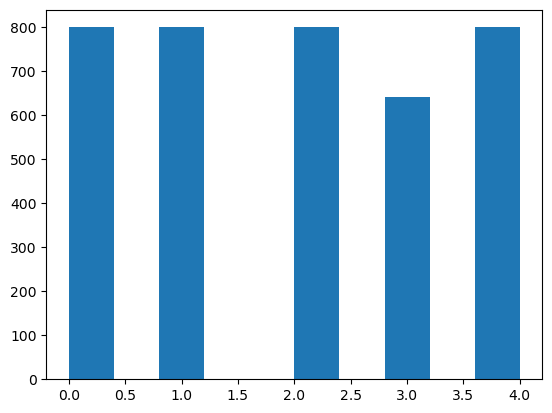

In [7]:
plt.hist(Y)

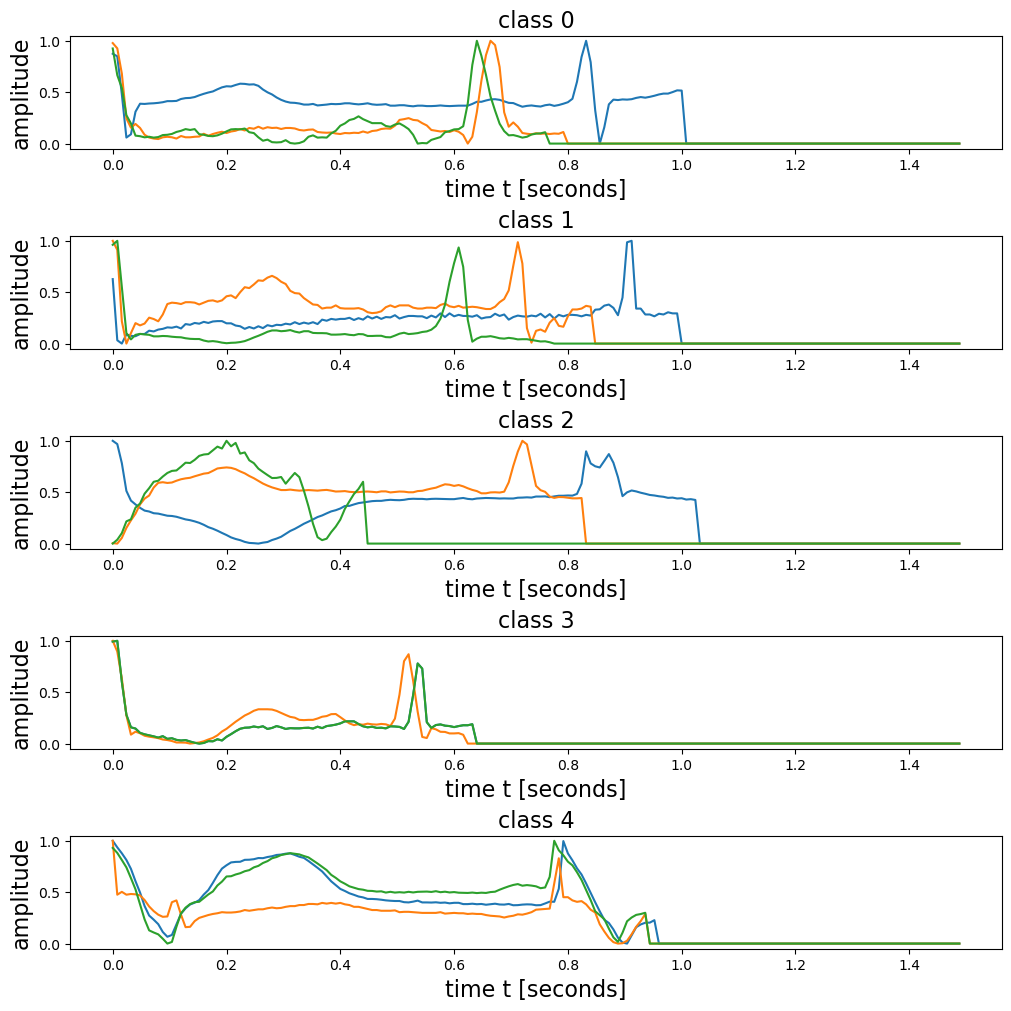

In [8]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [10]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(3072, 187)

In [11]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [12]:
Y_train.shape

(3072,)

In [13]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [14]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(769, 187)

In [15]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [16]:
Y_test.shape

(769,)

In [17]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

In [21]:
KNR2 = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1, 12, 1)}
KNR_gscv = GridSearchCV(KNR2, param_grid, cv = 5, scoring = 'accuracy', error_score = 'raise')
KNR_gscv.fit(X_train, Y_train)
KNR_gscv.best_params_
KNR_gscv.best_score_

0.8352824342575673

In [30]:
KNR = KNeighborsClassifier(n_neighbors =1 )
KNR.fit(X_train, Y_train)
y_pred = KNR.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.881664499349805


In [31]:
DTC = DecisionTreeClassifier(max_depth = 14 )
DTC = DTC.fit(X_train, Y_train)
y_pred = DTC.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.8387516254876463


In [32]:
DTC = DecisionTreeClassifier()
param_dict = { 'criterion':['gini', 'entropy'],
'max_depth':range(1,20)}
grid = GridSearchCV(DTC, param_grid = param_dict, cv = 5)
grid.fit(X_train, Y_train)
grid.best_params_
grid.best_score_

0.8098938057784487

In [34]:
RFC = RandomForestClassifier(max_depth = 14, max_features = 11)
RFC.fit(X_train, Y_train)
y_tpred = RFC.predict
y_pred = RFC.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9024707412223667


In [36]:
RFC = RandomForestClassifier()
forest_params = [{'max_depth' : list(range(10,15)), 'max_features' : list(range(0,14))}]
RFCV = GridSearchCV(RFC, forest_params, scoring = 'accuracy', cv = 5)
RFCV.fit(X_train, Y_train)
print(RFCV.best_params_)
print(RFCV.best_score_)

/Library/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Library/anaconda3/lib

{'max_depth': 14, 'max_features': 9}
0.8746781070416567


In [37]:
OptimumClassifierAccuracy = pd.DataFrame([('Training Accuracy', '0.8387516254876463', '0.8098938057784487', '0.8772786737639363'),
                   ('Test Accuracy', '0.881664499349805', '0.84915471', '0.91027308')], 
                   columns = (' ', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'))

In [38]:
OptimumClassifierAccuracy

,,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
0,Training Accuracy,0.8387516254876463,0.8098938057784487,0.8772786737639363
1,Test Accuracy,0.881664499349805,0.84915471,0.91027308
